#### Exploritory analyis of the dataset

In [19]:
### Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
### Importing data
df = pd.read_csv("case1Data.csv")
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
X_cont = X.iloc[:, : 95]
X_cat = X.iloc[:, 95 :]
df.head(10)

,y,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
0,375.823073,6.359019,-13.367120,-2.483750,-6.641891,11.733539,NaN,-17.085361,22.194764,16.827888,...,-10.200888,3.980048,-4.433274,-1.473723,NaN,74.0,72.0,72.0,73.0,73.0
1,266.811730,3.873664,-8.470389,-3.055012,NaN,11.420983,1.822330,-13.694100,22.738654,20.307503,...,-9.740207,NaN,-2.629314,4.816987,-12.240248,74.0,72.0,72.0,73.0,73.0
2,267.271759,5.275824,-12.070531,-1.366168,-4.819100,10.721527,-5.125992,-17.476865,NaN,15.963889,...,-14.501970,10.054005,NaN,NaN,-11.107921,73.0,72.0,75.0,74.0,74.0
3,219.951294,4.430110,-4.467975,-0.730736,-10.047104,11.498539,-2.870260,-14.033012,18.225190,10.409488,...,-11.086963,2.019726,-8.531959,3.520833,NaN,71.0,72.0,73.0,71.0,72.0
4,289.697954,3.116458,-8.518713,-6.796050,NaN,7.646285,-3.118309,-13.102567,22.801217,16.680208,...,-9.117422,6.627601,-2.805531,5.914351,-11.240573,72.0,72.0,72.0,74.0,75.0
5,265.753204,2.478883,-10.347278,-3.574333,-4.320143,NaN,-3.326662,-13.197508,23.424267,12.551075,...,-11.571283,7.487204,-5.098366,3.175914,-9.610356,71.0,72.0,74.0,71.0,75.0
6,133.594186,0.497803,-9.389992,-7.230404,-8.852222,12.308068,-5.288380,-9.998207,23.229430,13.491712,...,-15.720359,NaN,-6.235942,4.124001,-16.268568,74.0,72.0,75.0,71.0,75.0
7,252.251096,7.627311,-7.146660,0.244472,0.182987,NaN,-0.395215,-14.423119,NaN,NaN,...,-10.710254,7.884195,-2.402023,NaN,-4.631043,74.0,72.0,73.0,75.0,73.0
8,163.402815,4.981034,-8.719028,-5.484942,-5.919929,9.916674,-4.726807,-10.606375,24.903043,12.151393,...,-11.139651,7.096430,-2.865486,7.464922,-8.441735,NaN,NaN,NaN,NaN,NaN
9,282.511836,0.519655,-14.477831,-2.121282,NaN,12.080162,-6.393721,-11.599432,NaN,11.984299,...,-14.195198,2.409425,-3.523658,2.821658,-14.591262,75.0,72.0,72.0,74.0,71.0


- 100 observations (rows), 100 predictors (columns 1:), target value (column 0)

#### Unique values in thecategorical predictors columns

In [21]:
for col in X_cat.columns:
    print(f"Unique values in {col}: {X_cat[col].unique()}")

Unique values in C_01: [74. 73. 71. 72. nan 75.]
Unique values in C_02: [72. nan]
Unique values in C_03: [72. 75. 73. 74. nan 71.]
Unique values in C_04: [73. 74. 71. 75. nan 72.]
Unique values in C_05: [73. 74. 72. 75. nan 71.]


#### Plotting variables (checking if they are normally distributed)

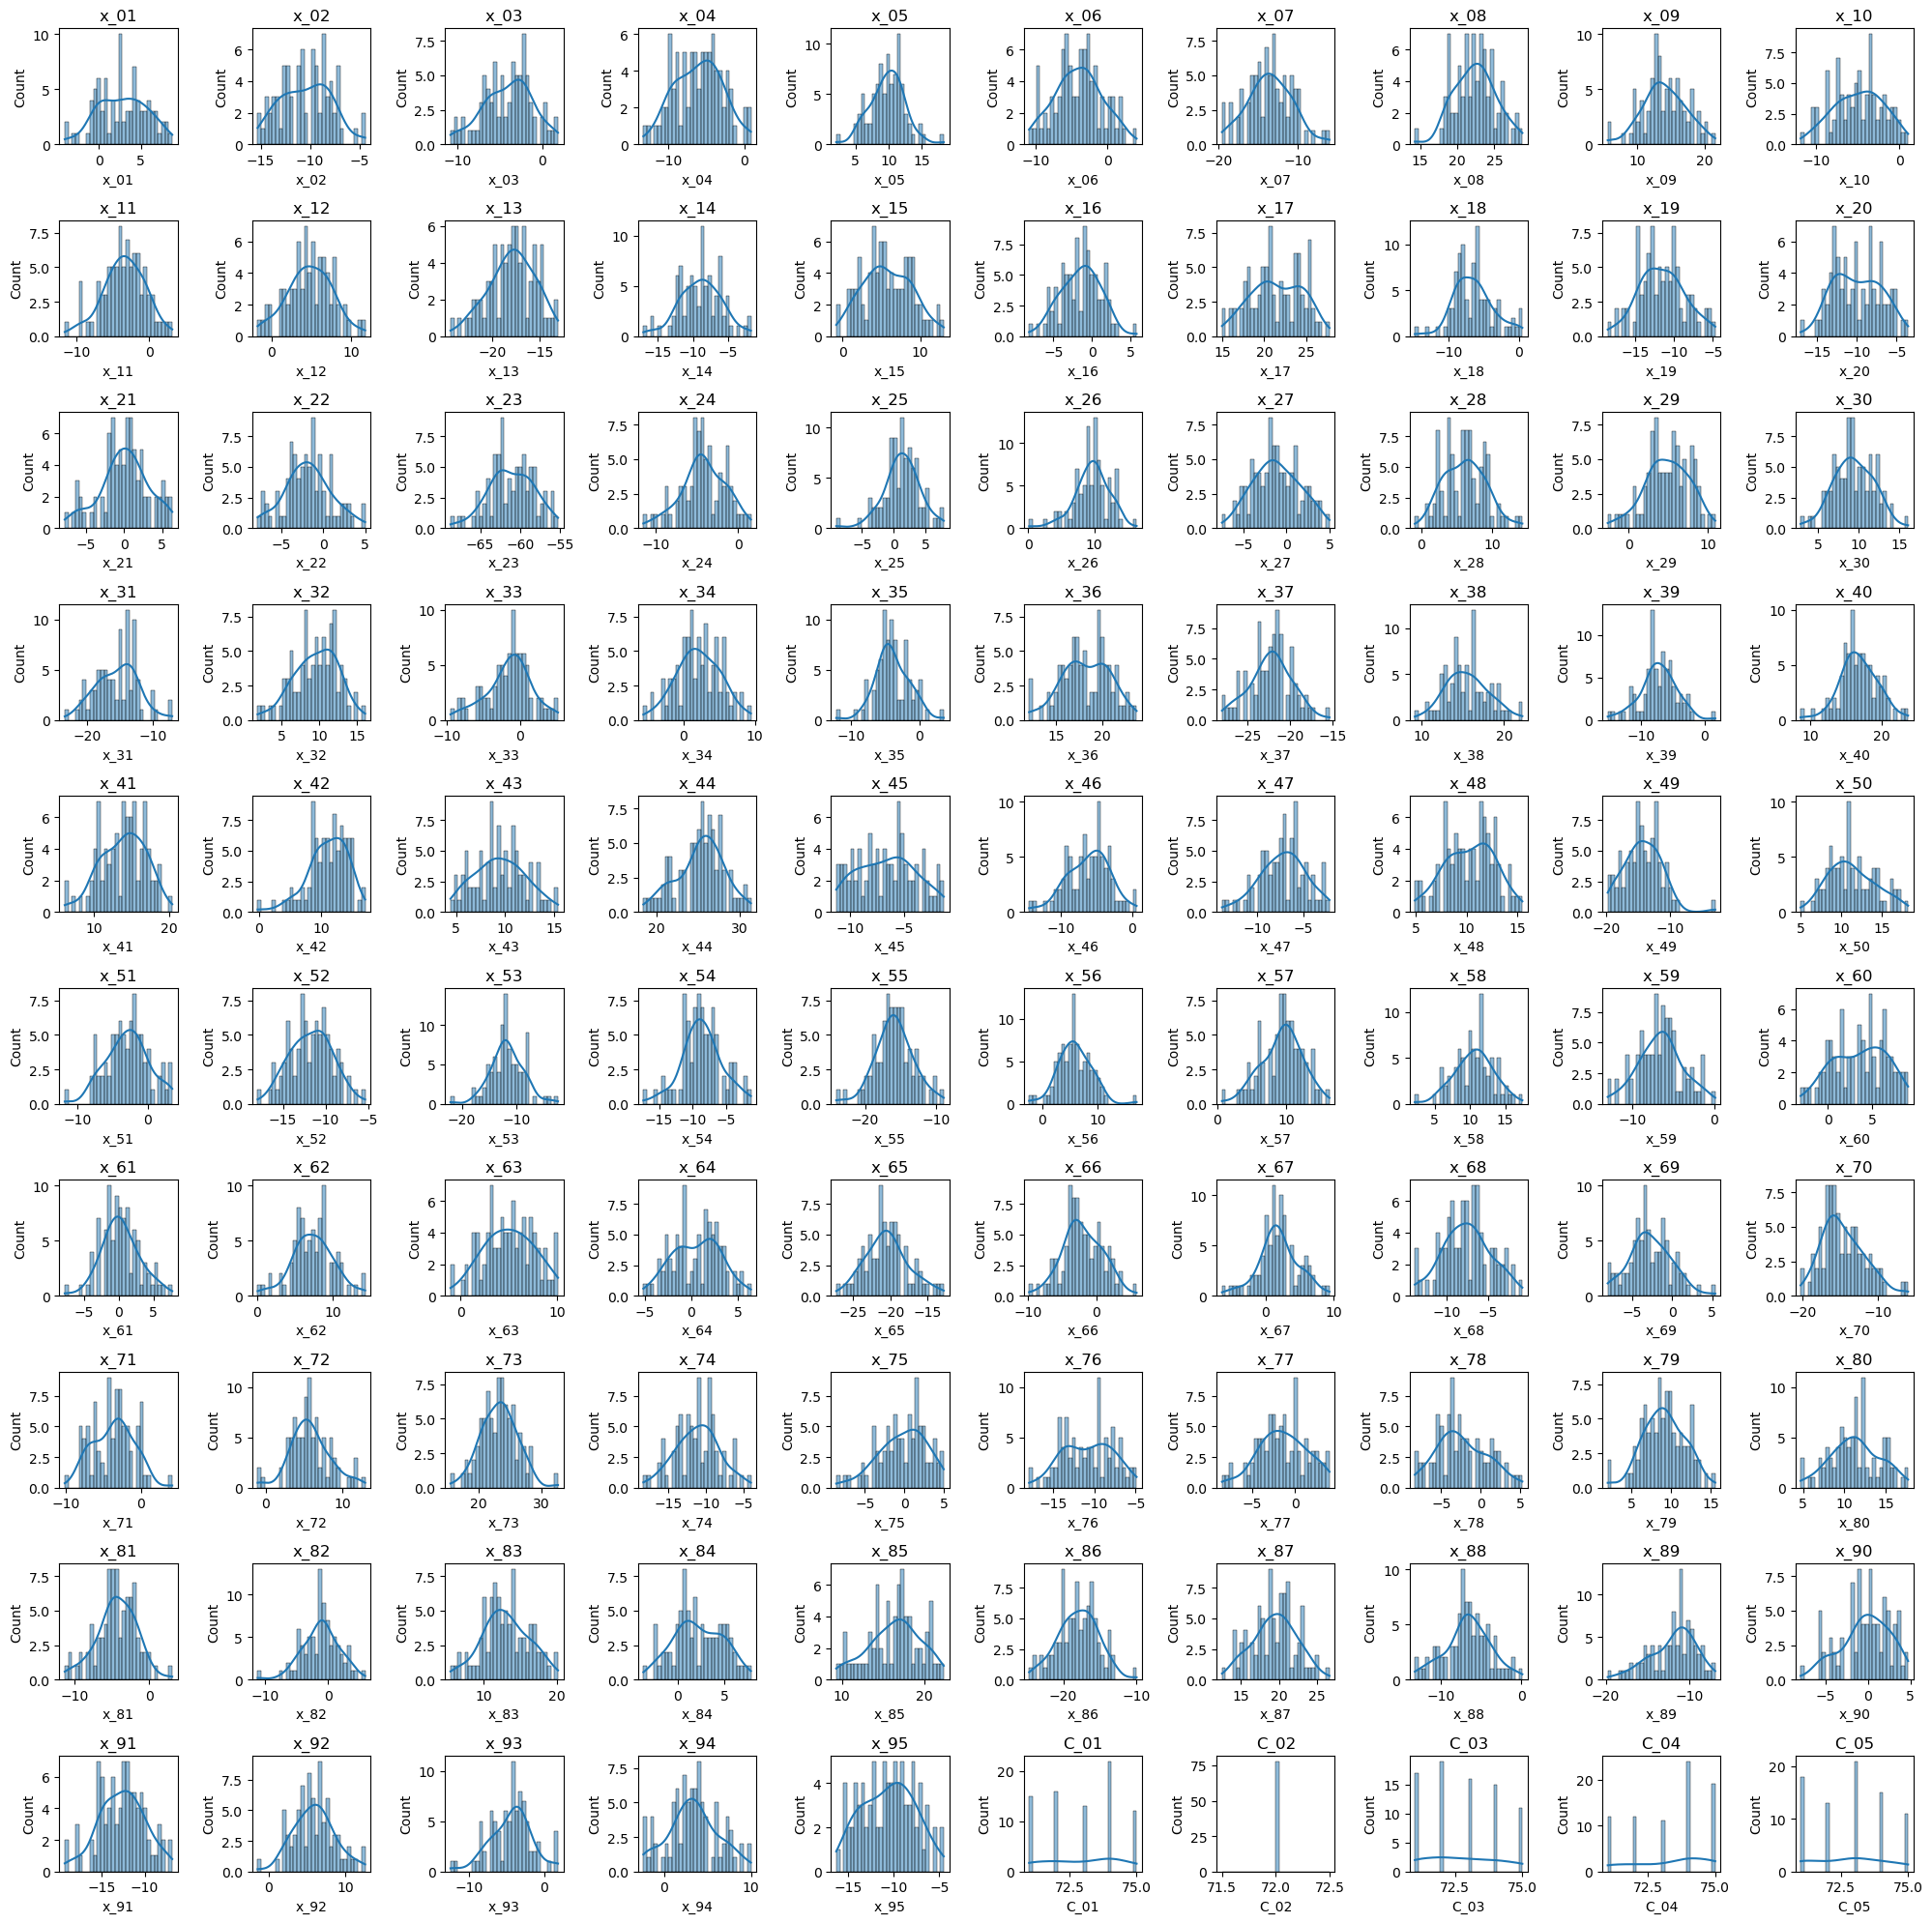

In [22]:
# Select only numerical columns
num_cols = X.columns

# Define the number of subplots
n_cols = 10  # Number of columns per row
n_rows = 10 # Calculate rows dynamically

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(num_cols):
    sns.histplot(X[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Plotting NaN values count for different features/ observations

C:\Users\osaul\AppData\Local\Temp\ipykernel_5076\1743393602.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nan_counts.index, y=nan_counts.values, palette="viridis", ax=axes[0])
C:\Users\osaul\AppData\Local\Temp\ipykernel_5076\1743393602.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nan_counts_per_row.index, y=nan_counts_per_row.values, palette="viridis", ax=axes[1])


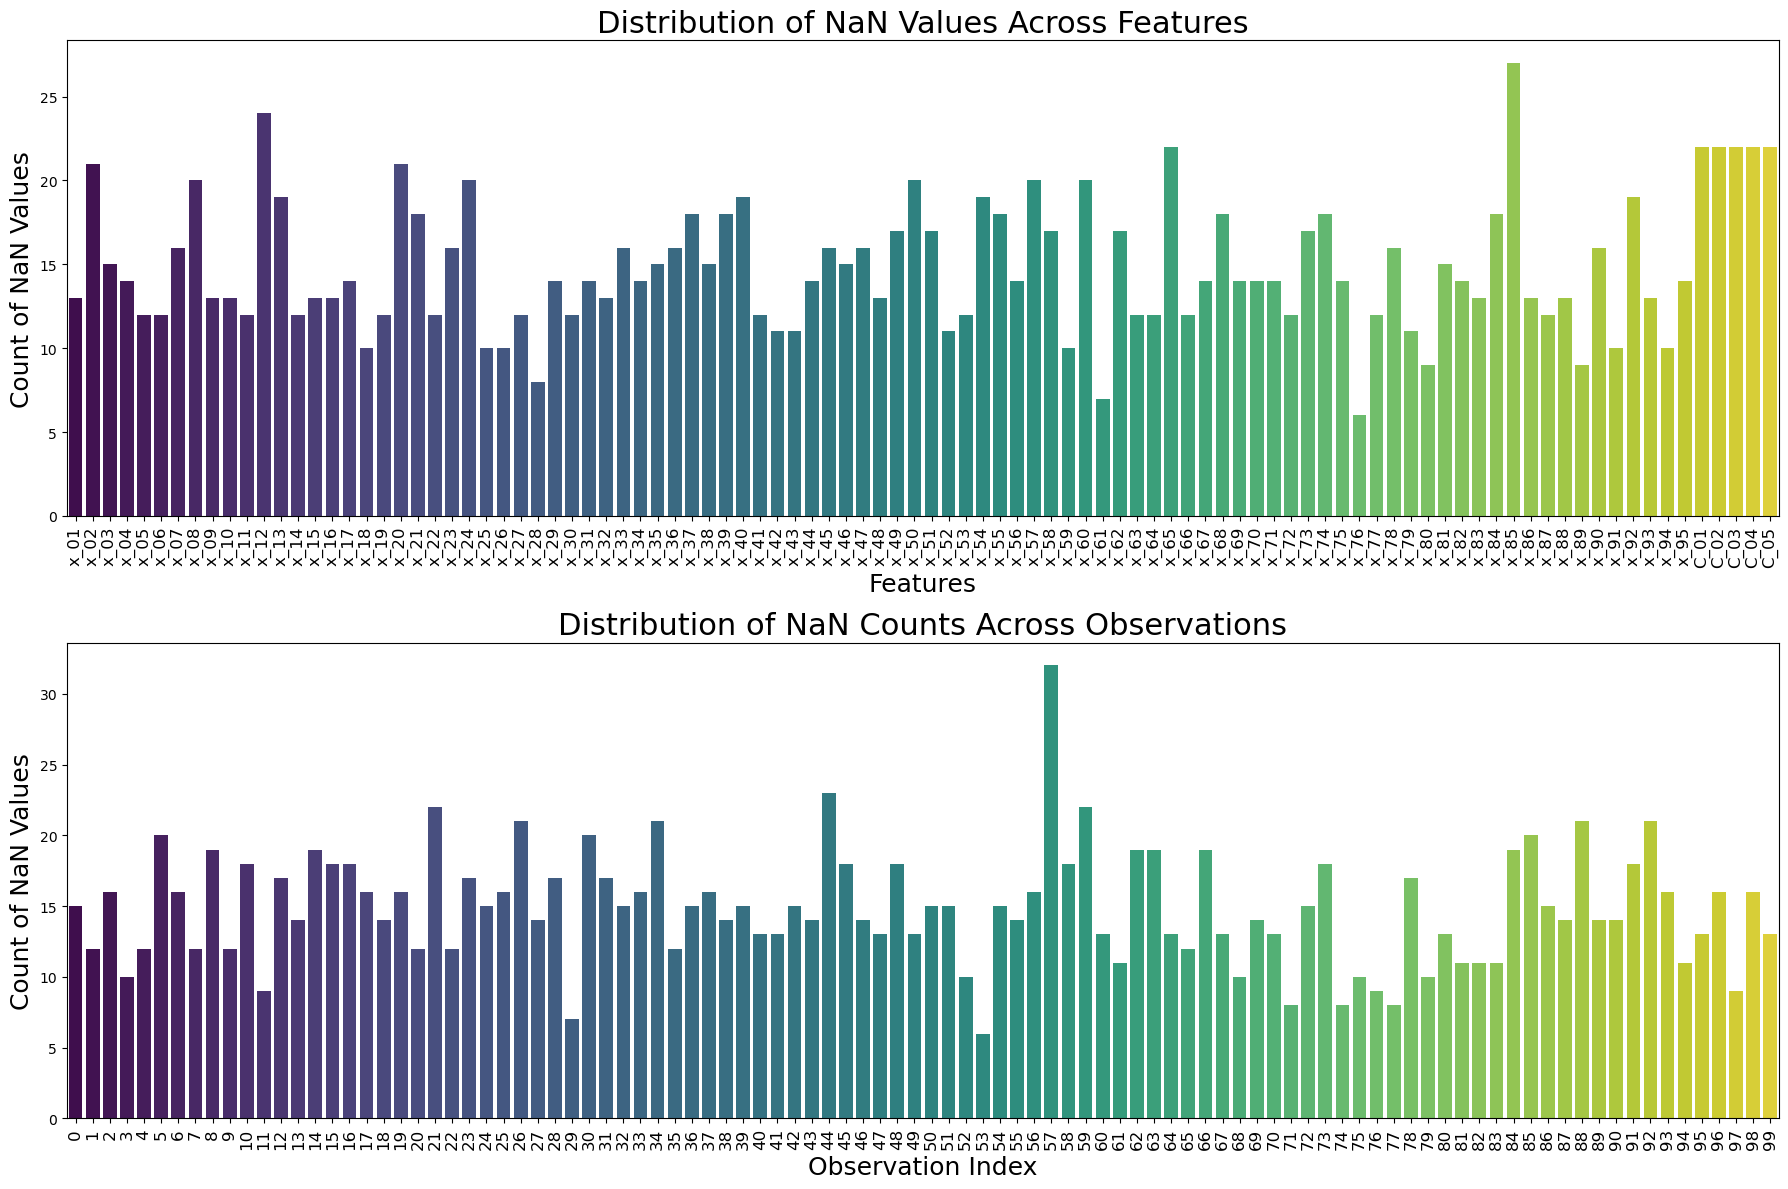

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your DataFrame
nan_counts = X.isna().sum()  # Count NaNs per feature
nan_counts_per_row = X.isna().sum(axis=1)  # Count NaNs per observation

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 12))  # 2 rows, 1 column

# Bar plot for NaN distribution across features
sns.barplot(x=nan_counts.index, y=nan_counts.values, palette="viridis", ax=axes[0])
axes[0].set_title("Distribution of NaN Values Across Features", fontsize=22)
axes[0].set_xlabel("Features", fontsize=18)
axes[0].set_ylabel("Count of NaN Values", fontsize=18)
axes[0].tick_params(axis='x', rotation=90, labelsize=12)  # Rotate feature names for readability

# Bar plot for NaN distribution across observations
sns.barplot(x=nan_counts_per_row.index, y=nan_counts_per_row.values, palette="viridis", ax=axes[1])
axes[1].set_title("Distribution of NaN Counts Across Observations", fontsize=22)
axes[1].set_xlabel("Observation Index", fontsize=18)
axes[1].set_ylabel("Count of NaN Values", fontsize=18)
axes[1].tick_params(axis='x', rotation=90, labelsize=12)  # Rotate observation indices for readability

# Adjust layout
plt.tight_layout()
plt.show()

#### Correlation analysis

In [24]:
# Compute correlation matrix 'y' included
corr_matrix_withY = df.corr()

# Plot heatmap
#plt.figure(figsize=(45, 45))
#sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
#plt.title("Correlation Matrix")
#plt.show()

# Get the correlation of each column with 'y'
correlation_with_y = corr_matrix_withY['y']
# Sort the correlations in descending order
sorted_correlation = correlation_with_y.sort_values(ascending=False)
# Print columns most correlated with 'y'
print(f"Features correlation with target variable: \n{sorted_correlation.drop("y").head(5)}\n")

# Compute correlation matrix without 'y'
corr_matrix_withoutY = X.corr().abs()
np.fill_diagonal(corr_matrix_withoutY.values, np.nan)
max_corr = corr_matrix_withoutY.max().mean()
print(f"Average predictors correaltion: {round(max_corr, 2)}\n")

# If any of the features are highly correlated (> ~0.8)
highly_correlated = corr_matrix_withoutY.abs().unstack().sort_values(ascending=False)
highly_correlated = highly_correlated[highly_correlated < 1] # reming diagonal
highly_correlated = highly_correlated[highly_correlated > 0.6]
print(f"Pairs of features having high correlation: \n{highly_correlated.head(10)}")

Features correlation with target variable: 
x_32    0.770303
x_36    0.478040
x_31    0.426011
x_14    0.404301
x_94    0.330637
Name: y, dtype: float64

Average predictors correaltion: 0.62

Pairs of features having high correlation: 
x_46  x_39    0.751971
x_39  x_46    0.751971
x_76  x_15    0.747985
x_15  x_76    0.747985
x_04  x_22    0.716159
x_22  x_04    0.716159
x_60  x_09    0.695746
x_09  x_60    0.695746
x_46  x_85    0.678939
x_85  x_46    0.678939
dtype: float64


#### Checking how skewed the data is (tolerated if -1 < data < 1)

In [25]:
skewness = X_cont.skew()

# Print skewness for all columns, sorted by their absolute skewness value
print("All columns sorted by absolute skewness:")
print(skewness.abs().sort_values(ascending=False).head(5))

# Filter and print only the highly skewed columns
highly_skewed = skewness[abs(skewness) > 1]
print(f"\nHighly skewed columns (abs(skewness) > 1): {len(highly_skewed)}")

All columns sorted by absolute skewness:
x_42    0.817905
x_89    0.622233
x_70    0.621823
x_26    0.621106
x_49    0.504576
dtype: float64

Highly skewed columns (abs(skewness) > 1): 0


Based on the initial exploratory analysis of the data, we observed the following:
- The dataset consists of 95 continuous and 5 categorical predictors.
- All predictors and samples contain missing values. Since every sample has missing data and the dataset is relatively small, removing samples is not a viable option.
- The continuous predictors appear to be approximately normally distributed, as observed from their histograms.
- The categorical predictors initially resemble integers, with values ranging from 72 to 75, and only whole numbers allowed.
- x_32 shows the highest correlation with the target variable (y), reaching an absolute value of 0.77, followed by x_36 with a correlation of 0.47.
- Some features exhibit high intercorrelation, such as x_46 and x_39 and x_76 and x_15, both with absolute correlation values of approximately 0.75. However, since our primary goal is to develop the best-performing model, slight intercorrelation may not be a significant concern. 
- The skewness analysis indicates that none of the predictors are highly skewed, as all have absolute skewness values below 1.